In [67]:
import matplotlib.pyplot as plt
import numpy as np
from operator import add

%matplotlib notebook

In [122]:
# f frequency
# s sample rate per second
def make_sine(f, s, a):
    x = np.arange(s)
    y = [ np.sin(2*np.pi*f * (i/s)) * a for i in np.arange(s)]
    return x, y


1000


<IPython.core.display.Javascript object>


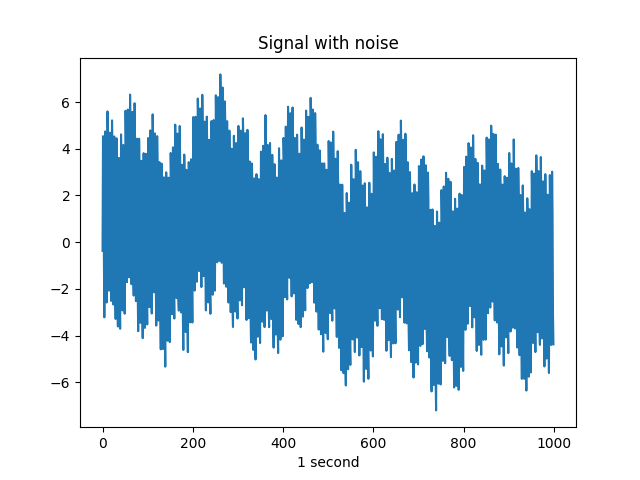

<IPython.core.display.Javascript object>


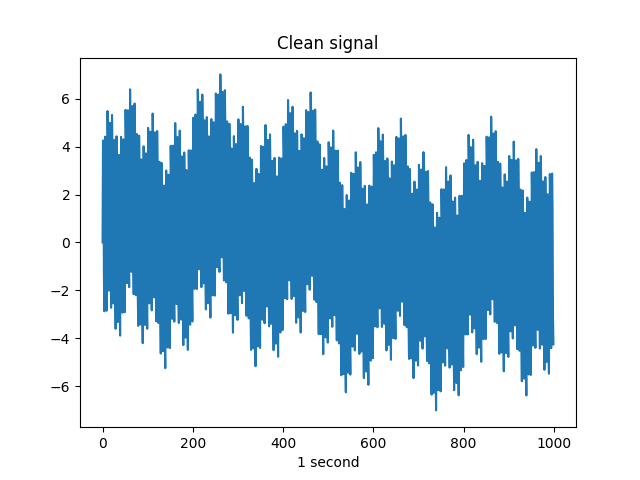

In [155]:
_, w1 = make_sine(1, 1000, 1)
_, w2 = make_sine(5, 1000, 1)
x, w3 = make_sine(20, 1000, 1)
x, w4 = make_sine(100, 1000, 0.5)
x, w5 = make_sine(200, 1000, 4)
print(len(x))

# Combine 1, 5, 20, 100, 200 Hz sine waves
wall = w1
wall = [a + b for a, b in zip(wall, w2)]
wall = [a + b for a, b in zip(wall, w3)]
wall = [a + b for a, b in zip(wall, w4)]
wall = [a + b for a, b in zip(wall, w5)]

# Add small amount of noise
noise = np.random.normal(0, 0.2, len(wall))

# Signal with noise
walln = [a + b for a, b in zip(wall, noise)]
plt.figure()
plt.title("Signal with noise")
plt.xlabel("1 second")
plt.plot(walln)
plt.show()

# Clean sigmal
plt.figure()
plt.title("Clean signal")
plt.xlabel("1 second")
#plt.plot(w1)
#plt.plot(w2)
#plt.plot(w3)
#plt.plot(w4)
#plt.plot(w5)
plt.plot(wall)
plt.show()

In [156]:
# Write to ../data/file.csv

signal = walln

with open("../data/sine.csv", "w") as f:
    f.write("X,CH1")
    f.write("Sequence,Volt\n")
    
    for s in range(len(signal)):
        line = "{:d},{:.2f}\n".format(s, signal[s])
        f.write(line)